<a href="https://colab.research.google.com/github/Karanam14/Projects.github.io/blob/main/IOT_Sensor_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Sensors.csv to Sensors.csv


In [4]:
df = pd.read_csv("Sensors.csv")

In [5]:
df.head()

,Sensor_Value,Tolerance_Value\n,Output
0,0.7,0.01,pH
1,2.0,0.01,pH
2,10.0,0.01,pH
3,7.0,0.01,pH
4,7.5,0.01,pH


In [6]:
df.columns

Index(['Sensor_Value', 'Tolerance_Value\n', 'Output'], dtype='object')

In [7]:
df.columns = (['Sensor_Value', 'Tolerance_Value', 'Output'])

In [8]:
df.shape

(75, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sensor_Value     75 non-null     float64
 1   Tolerance_Value  75 non-null     float64
 2   Output           75 non-null     object 
dtypes: float64(2), object(1)
memory usage: 1.9+ KB


In [10]:
df.describe()

,Sensor_Value,Tolerance_Value
count,75.000000,75.000000
mean,29.416000,1.935733
std,22.657157,1.173883
min,0.000000,0.010000
25%,8.750000,2.000000
50%,26.000000,2.000000
75%,45.000000,3.000000
max,80.000000,3.000000


In [11]:
#Checking Missing Values
df.isnull().sum()

Sensor_Value       0
Tolerance_Value    0
Output             0
dtype: int64

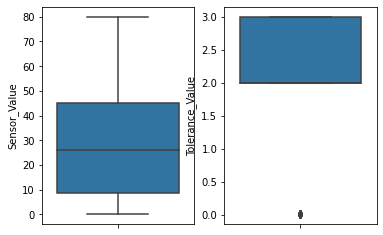

In [12]:
#Checking Outliers
i=1
for x in df.columns[:-1]:
    plt.subplot(1,2,i)
    sns.boxplot(y=df[x])
    i+=1

In [13]:
df.Output.unique()

array(['pH', 'dht', 'ultrasonic'], dtype=object)

In [14]:
df.Output=df.Output.map({'pH':0,'dht':1,'ultrasonic':2})

In [15]:
X = df.iloc[:,0:2]

In [16]:
Y = df.Output

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)## will checck Mu and sigma values for each varible 
print(X)

[[-1.27594896 -1.65152913]
 [-1.21818556 -1.65152913]
 [-0.86271852 -1.65152913]
 [-0.99601866 -1.65152913]
 [-0.97380197 -1.65152913]
 [-1.01823535 -1.65152913]
 [-1.1293188  -1.65152913]
 [-1.06266873 -1.65152913]
 [-0.81828514 -1.65152913]
 [-0.95158528 -1.65152913]
 [-1.04045204 -1.65152913]
 [-1.01823535 -1.65152913]
 [-0.88493521 -1.65152913]
 [-0.97380197 -1.65152913]
 [-1.15153549 -1.65152913]
 [-1.1293188  -1.65152913]
 [-1.21818556 -1.65152913]
 [-1.30705232 -1.65152913]
 [-0.64055161  0.05511577]
 [-0.32951795  0.05511577]
 [-0.19621781  0.05511577]
 [ 0.38141614  0.05511577]
 [ 0.64801642  0.05511577]
 [-0.15178443  0.05511577]
 [-0.10735105  0.05511577]
 [-0.77385176  0.05511577]
 [-0.32951795  0.05511577]
 [-0.06291767  0.05511577]
 [ 0.15924924  0.05511577]
 [ 0.20368262  0.05511577]
 [ 0.64801642  0.05511577]
 [ 0.4702829   0.05511577]
 [-0.50725147  0.05511577]
 [-0.81828514  0.05511577]
 [ 0.11481586  0.05511577]
 [-0.24065119  0.05511577]
 [ 0.6924498   0.05511577]
 

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, 
random_state=10)

In [19]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
c=LogisticRegression()
c.fit(X_train, Y_train)
Y_pred=c.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
lracc = accuracy_score(Y_test,Y_pred)
print(lracc)

[[2 0 0]
 [0 4 0]
 [0 0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

1.0


In [21]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_test)

In [22]:
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
dtacc = accuracy_score(Y_test,Y_pred)
print(dtacc)

[[2 0 0]
 [0 4 0]
 [0 0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

1.0


In [23]:
#Random Forests
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)

In [24]:
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
rfacc = accuracy_score(Y_test,Y_pred)
print(rfacc)

[[2 0 0]
 [0 4 0]
 [0 0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

1.0


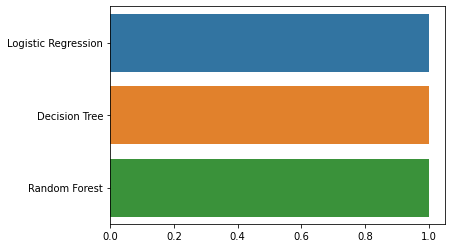

In [25]:
#Comparision Of Models
sns.barplot(y=['Logistic Regression','Decision Tree','Random Forest'],x=[lracc,dtacc,rfacc])
plt.show()